<!-- dom:TITLE: Data Analysis and Machine Learning: Convolutional Neural Networks -->
# Data Analysis and Machine Learning: Convolutional Neural Networks
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University

Date: **Mar 11, 2019**

Copyright 1999-2019, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license




## Convolutional Neural Networks (recognizing images)

Convolutional Neural Networks (CNN) are very similar to ordinary Neural Networks.

They are made up of neurons that have learnable weights and
biases. Each neuron receives some inputs, performs a dot product and
optionally follows it with a non-linearity. The whole network still
expresses a single differentiable score function: from the raw image
pixels on one end to class scores at the other. And they still have a
loss function (for example Softmax) on the last (fully-connected) layer
and all the tips/tricks we developed for learning regular Neural
Networks still apply (back propagation, gradient descent etc etc).

What is the difference? **CNN architectures make the explicit assumption that
the inputs are images, which allows us to encode certain properties
into the architecture. These then make the forward function more
efficient to implement and vastly reduce the amount of parameters in
the network.**

Here we provide only a superficial overview, for the more interested, we recommend highly the course
[IN5400 – Machine Learning for Image Analysis](https://www.uio.no/studier/emner/matnat/ifi/IN5400/index-eng.html)
and the slides of [CS231](http://cs231n.github.io/convolutional-networks/).

## Regular NNs don’t scale well to full images

As an example, consider
an image of size $32\times 32\times 3$ (32 wide, 32 high, 3 color channels), so a
single fully-connected neuron in a first hidden layer of a regular
Neural Network would have $32\times 32\times 3 = 3072$ weights. This amount still
seems manageable, but clearly this fully-connected structure does not
scale to larger images. For example, an image of more respectable
size, say $200\times 200\times 3$, would lead to neurons that have 
$200\times 200\times 3 = 120,000$ weights. 

We could have
several such neurons, and the parameters would add up quickly! Clearly,
this full connectivity is wasteful and the huge number of parameters
would quickly lead to possible overfitting.

<!-- dom:FIGURE: [figslides/nn.jpeg, width=500 frac=0.6]  A regular 3-layer Neural Network. -->
<!-- begin figure -->

<p>A regular 3-layer Neural Network.</p>
<img src="figslides/nn.jpeg" width=500>

<!-- end figure -->


## 3D volumes of neurons

Convolutional Neural Networks take advantage of the fact that the
input consists of images and they constrain the architecture in a more
sensible way. 

In particular, unlike a regular Neural Network, the
layers of a CNN have neurons arranged in 3 dimensions: width,
height, depth. (Note that the word depth here refers to the third
dimension of an activation volume, not to the depth of a full Neural
Network, which can refer to the total number of layers in a network.)

To understand it better, the above example of an image 
with an input volume of
activations has dimensions $32\times 32\times 3$ (width, height,
depth respectively). 

The neurons in a layer will
only be connected to a small region of the layer before it, instead of
all of the neurons in a fully-connected manner. Moreover, the final
output layer could  for this specific image have dimensions $1\times 1 \times 10$, 
because by the
end of the CNN architecture we will reduce the full image into a
single vector of class scores, arranged along the depth
dimension. 

<!-- dom:FIGURE: [figslides/cnn.jpeg, width=500 frac=0.6]  A CNN arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers. Every layer of a CNN transforms the 3D input volume to a 3D output volume of neuron activations. In this example, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (Red, Green, Blue channels). -->
<!-- begin figure -->

<p>A CNN arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers. Every layer of a CNN transforms the 3D input volume to a 3D output volume of neuron activations. In this example, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (Red, Green, Blue channels).</p>
<img src="figslides/cnn.jpeg" width=500>

<!-- end figure -->




<!-- !split  -->
## Layers used to build CNNs


A simple CNN is a sequence of layers, and every layer of a CNN
transforms one volume of activations to another through a
differentiable function. We use three main types of layers to build
CNN architectures: Convolutional Layer, Pooling Layer, and
Fully-Connected Layer (exactly as seen in regular Neural Networks). We
will stack these layers to form a full CNN architecture.

A simple CNN for image classification could have the architecture:

* **INPUT** ($32\times 32 \times 3$) will hold the raw pixel values of the image, in this case an image of width 32, height 32, and with three color channels R,G,B.

* **CONV** (convolutional )layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume. This may result in volume such as $[32\times 32\times 12]$ if we decided to use 12 filters.

* **RELU** layer will apply an elementwise activation function, such as the $max(0,x)$ thresholding at zero. This leaves the size of the volume unchanged ($[32\times 32\times 12]$).

* **POOL** (pooling) layer will perform a downsampling operation along the spatial dimensions (width, height), resulting in volume such as $[16\times 16\times 12]$.

* **FC** (i.e. fully-connected) layer will compute the class scores, resulting in volume of size $[1\times 1\times 10]$, where each of the 10 numbers correspond to a class score, such as among the 10 categories of the MNIST images we considered above . As with ordinary Neural Networks and as the name implies, each neuron in this layer will be connected to all the numbers in the previous volume.

## Transforming images

CNNs transform the original image layer by layer from the original
pixel values to the final class scores. 

Observe that some layers contain
parameters and other don’t. In particular, the CNN layers perform
transformations that are a function of not only the activations in the
input volume, but also of the parameters (the weights and biases of
the neurons). On the other hand, the RELU/POOL layers will implement a
fixed function. The parameters in the CONV/FC layers will be trained
with gradient descent so that the class scores that the CNN computes
are consistent with the labels in the training set for each image.


## CNNs in brief

In summary:

* A CNN architecture is in the simplest case a list of Layers that transform the image volume into an output volume (e.g. holding the class scores)

* There are a few distinct types of Layers (e.g. CONV/FC/RELU/POOL are by far the most popular)

* Each Layer accepts an input 3D volume and transforms it to an output 3D volume through a differentiable function

* Each Layer may or may not have parameters (e.g. CONV/FC do, RELU/POOL don’t)

* Each Layer may or may not have additional hyperparameters (e.g. CONV/FC/POOL do, RELU doesn’t)

For more material on convolutional networks, we strongly recommend
the course
[IN5400 – Machine Learning for Image Analysis](https://www.uio.no/studier/emner/matnat/ifi/IN5400/index-eng.html)
and the slides of [CS231](http://cs231n.github.io/convolutional-networks/) which is taught at Stanford University (consistently ranked as one of the top computer science programs in the world). [Michael Nielsen's book is a must read, in particular chapter 6 which deals with CNNs](http://neuralnetworksanddeeplearning.com/chap6.html).


## CNNs in more detail, building convolutional neural networks in Tensorflow and Keras


As discussed above, CNNs are neural networks built from the assumption that the inputs
to the network are 2D images. This is important because the number of features or pixels in images
grows very fast with the image size, and an enormous number of weights and biases are needed in order to build an accurate network.  

As before, we still have our input, a hidden layer and an output. What's novel about convolutional networks
are the **convolutional** and **pooling** layers stacked in pairs between the input and the hidden layer.
In addition, the data is no longer represented as a 2D feature matrix, instead each input is a number of 2D
matrices, typically 1 for each color dimension (Red, Green, Blue). 


## Setting it up

It means that to represent the entire
dataset of images, we require a 4D matrix or **tensor**. This tensor has the dimensions:

$$
(n_{inputs},\, n_{pixels, width},\, n_{pixels, height},\, depth) .
$$

## The MNIST dataset again

The MNIST dataset consists of grayscale images with a pixel size of
$28\times 28$, meaning we require $28 \times 28 = 724$ weights to each
neuron in the first hidden layer.

If we were to analyze images of size $128\times 128$ we would require
$128 \times 128 = 16384$ weights to each neuron. Even worse if we were
dealing with color images, as most images are, we have an image matrix
of size $128\times 128$ for each color dimension (Red, Green, Blue),
meaning 3 times the number of weights $= 49152$ are required for every
single neuron in the first hidden layer.


## Strong correlations
Images typically have strong local correlations, meaning that a small
part of the image varies little from its neighboring regions. If for
example we have an image of a blue car, we can roughly assume that a
small blue part of the image is surrounded by other blue regions.

Therefore, instead of connecting every single pixel to a neuron in the
first hidden layer, as we have previously done with deep neural
networks, we can instead connect each neuron to a small part of the
image (in all 3 RGB depth dimensions).  The size of each small area is
fixed, and known as a [receptive](https://en.wikipedia.org/wiki/Receptive_field).


<!-- !split  -->
## Layers of a CNN
The layers of a convolutional neural network arrange neurons in 3D: width, height and depth.  
The input image is typically a square matrix of depth 3. 

A **convolution** is performed on the image which outputs
a 3D volume of neurons. The weights to the input are arranged in a number of 2D matrices, known as **filters**.


Each filter slides along the input image, taking the dot product
between each small part of the image and the filter, in all depth
dimensions. This is then passed through a non-linear function,
typically the **Rectified Linear (ReLu)** function, which serves as the
activation of the neurons in the first convolutional layer. This is
further passed through a **pooling layer**, which reduces the size of the
convolutional layer, e.g. by taking the maximum or average across some
small regions, and this serves as input to the next convolutional
layer.


## Systematic reduction

By systematically reducing the size of the input volume, through
convolution and pooling, the network should create representations of
small parts of the input, and then from them assemble representations
of larger areas.  The final pooling layer is flattened to serve as
input to a hidden layer, such that each neuron in the final pooling
layer is connected to every single neuron in the hidden layer. This
then serves as input to the output layer, e.g. a softmax output for
classification.


## Prerequisites: Collect and pre-process data

inputs = (n_inputs, pixel_width, pixel_height, depth) = (1797, 8, 8, 1)
labels = (n_inputs) = (1797,)


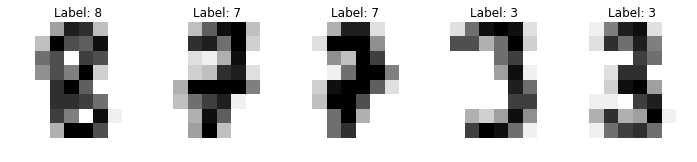

In [1]:
%matplotlib inline

# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# ensure the same random numbers appear every time
np.random.seed(0)

# display images in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)


# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

# RGB images have a depth of 3
# our images are grayscale so they should have a depth of 1
inputs = inputs[:,:,:,np.newaxis]

print("inputs = (n_inputs, pixel_width, pixel_height, depth) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# choose some random images to display
n_inputs = len(inputs)
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()

## Importing Keras and Tensorflow

In [2]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# representation of labels
labels = to_categorical(labels)

# split into train and test data
# one-liner from scikit-learn library
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)

Using TensorFlow backend.


## Using TensorFlow backend

We need to define model and architecture and choose cost function and optmizer.

In [3]:

import tensorflow as tf

class ConvolutionalNeuralNetworkTensorflow:
    def __init__(
            self,
            X_train,
            Y_train,
            X_test,
            Y_test,
            n_filters=10,
            n_neurons_connected=50,
            n_categories=10,
            receptive_field=3,
            stride=1,
            padding=1,
            epochs=10,
            batch_size=100,
            eta=0.1,
            lmbd=0.0):
        
        self.global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')
        
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
        
        self.n_inputs, self.input_width, self.input_height, self.depth = X_train.shape
        
        self.n_filters = n_filters
        self.n_downsampled = int(self.input_width*self.input_height*n_filters / 4)
        self.n_neurons_connected = n_neurons_connected
        self.n_categories = n_categories
        
        self.receptive_field = receptive_field
        self.stride = stride
        self.strides = [stride, stride, stride, stride]
        self.padding = padding
        
        self.epochs = epochs
        self.batch_size = batch_size
        self.iterations = self.n_inputs // self.batch_size
        self.eta = eta
        self.lmbd = lmbd
        
        self.create_placeholders()
        self.create_CNN()
        self.create_loss()
        self.create_optimiser()
        self.create_accuracy()
    
    def create_placeholders(self):
        with tf.name_scope('data'):
            self.X = tf.placeholder(tf.float32, shape=(None, self.input_width, self.input_height, self.depth), name='X_data')
            self.Y = tf.placeholder(tf.float32, shape=(None, self.n_categories), name='Y_data')
    
    def create_CNN(self):
        with tf.name_scope('CNN'):
            
            # Convolutional layer
            self.W_conv = self.weight_variable([self.receptive_field, self.receptive_field, self.depth, self.n_filters], name='conv', dtype=tf.float32)
            b_conv = self.weight_variable([self.n_filters], name='conv', dtype=tf.float32)
            z_conv = tf.nn.conv2d(self.X, self.W_conv, self.strides, padding='SAME', name='conv') + b_conv
            a_conv = tf.nn.relu(z_conv)
            
            # 2x2 max pooling
            a_pool = tf.nn.max_pool(a_conv, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME', name='pool')
            
            # Fully connected layer
            a_pool_flat = tf.reshape(a_pool, [-1, self.n_downsampled])
            self.W_fc = self.weight_variable([self.n_downsampled, self.n_neurons_connected], name='fc', dtype=tf.float32)
            b_fc = self.bias_variable([self.n_neurons_connected], name='fc', dtype=tf.float32)
            a_fc = tf.nn.relu(tf.matmul(a_pool_flat, self.W_fc) + b_fc)
            
            # Output layer
            self.W_out = self.weight_variable([self.n_neurons_connected, self.n_categories], name='out', dtype=tf.float32)
            b_out = self.bias_variable([self.n_categories], name='out', dtype=tf.float32)
            self.z_out = tf.matmul(a_fc, self.W_out) + b_out
    
    def create_loss(self):
        with tf.name_scope('loss'):
            softmax_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=self.Y, logits=self.z_out))
            
            regularizer_loss_conv = tf.nn.l2_loss(self.W_conv)
            regularizer_loss_fc = tf.nn.l2_loss(self.W_fc)
            regularizer_loss_out = tf.nn.l2_loss(self.W_out)
            regularizer_loss = self.lmbd*(regularizer_loss_conv + regularizer_loss_fc + regularizer_loss_out)
            
            self.loss = softmax_loss + regularizer_loss

    def create_accuracy(self):
        with tf.name_scope('accuracy'):
            probabilities = tf.nn.softmax(self.z_out)
            predictions = tf.argmax(probabilities, 1)
            labels = tf.argmax(self.Y, 1)
            
            correct_predictions = tf.equal(predictions, labels)
            correct_predictions = tf.cast(correct_predictions, tf.float32)
            self.accuracy = tf.reduce_mean(correct_predictions)
    
    def create_optimiser(self):
        with tf.name_scope('optimizer'):
            self.optimizer = tf.train.GradientDescentOptimizer(learning_rate=self.eta).minimize(self.loss, global_step=self.global_step)
            
    def weight_variable(self, shape, name='', dtype=tf.float32):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial, name=name, dtype=dtype)
    
    def bias_variable(self, shape, name='', dtype=tf.float32):
        initial = tf.constant(0.1, shape=shape)
        return tf.Variable(initial, name=name, dtype=dtype)

    def fit(self):
        data_indices = np.arange(self.n_inputs)

        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for i in range(self.epochs):
                for j in range(self.iterations):
                    chosen_datapoints = np.random.choice(data_indices, size=self.batch_size, replace=False)
                    batch_X, batch_Y = self.X_train[chosen_datapoints], self.Y_train[chosen_datapoints]
            
                    sess.run([CNN.loss, CNN.optimizer],
                        feed_dict={CNN.X: batch_X,
                                   CNN.Y: batch_Y})
                    accuracy = sess.run(CNN.accuracy,
                        feed_dict={CNN.X: batch_X,
                                   CNN.Y: batch_Y})
                    step = sess.run(CNN.global_step)
    
            self.train_loss, self.train_accuracy = sess.run([CNN.loss, CNN.accuracy],
                feed_dict={CNN.X: self.X_train,
                           CNN.Y: self.Y_train})
        
            self.test_loss, self.test_accuracy = sess.run([CNN.loss, CNN.accuracy],
                feed_dict={CNN.X: self.X_test,
                           CNN.Y: self.Y_test})

## Train the model

We need now to train the model, evaluate it and test its performance on test data, and eventually include hyperparameters.

In [4]:
epochs = 100
batch_size = 100
n_filters = 10
n_neurons_connected = 50
n_categories = 10

eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
CNN_tf = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
        
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        CNN = ConvolutionalNeuralNetworkTensorflow(X_train, Y_train, X_test, Y_test,
                                      n_filters=n_filters, n_neurons_connected=n_neurons_connected,
                                      n_categories=n_categories, epochs=epochs, batch_size=batch_size,
                                      eta=eta, lmbd=lmbd)
        CNN.fit()
        
        print("Learning rate = ", eta)
        print("Lambda = ", lmbd)
        print("Test accuracy: %.3f" % CNN.test_accuracy)
        print()
            
        CNN_tf[i][j] = CNN

Instructions for updating:
Colocations handled automatically by placer.
Learning rate =  1e-05
Lambda =  1e-05
Test accuracy: 0.072

Learning rate =  1e-05
Lambda =  0.0001
Test accuracy: 0.131

Learning rate =  1e-05
Lambda =  0.001
Test accuracy: 0.136

Learning rate =  1e-05
Lambda =  0.01
Test accuracy: 0.033

Learning rate =  1e-05
Lambda =  0.1
Test accuracy: 0.136

Learning rate =  1e-05
Lambda =  1.0
Test accuracy: 0.122

Learning rate =  1e-05
Lambda =  10.0
Test accuracy: 0.103

Learning rate =  0.0001
Lambda =  1e-05
Test accuracy: 0.286

Learning rate =  0.0001
Lambda =  0.0001
Test accuracy: 0.294

Learning rate =  0.0001
Lambda =  0.001
Test accuracy: 0.256

Learning rate =  0.0001
Lambda =  0.01
Test accuracy: 0.369

Learning rate =  0.0001
Lambda =  0.1
Test accuracy: 0.278

Learning rate =  0.0001
Lambda =  1.0
Test accuracy: 0.356

Learning rate =  0.0001
Lambda =  10.0
Test accuracy: 0.153

Learning rate =  0.001
Lambda =  1e-05
Test accuracy: 0.908

Learning rate = 

## Visualizing the results

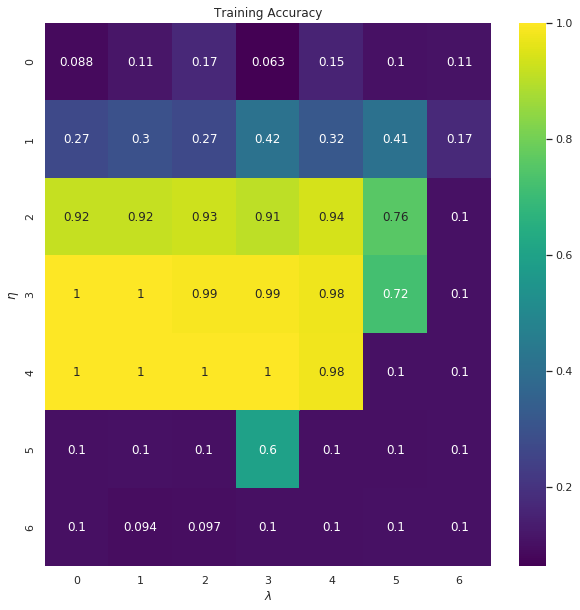

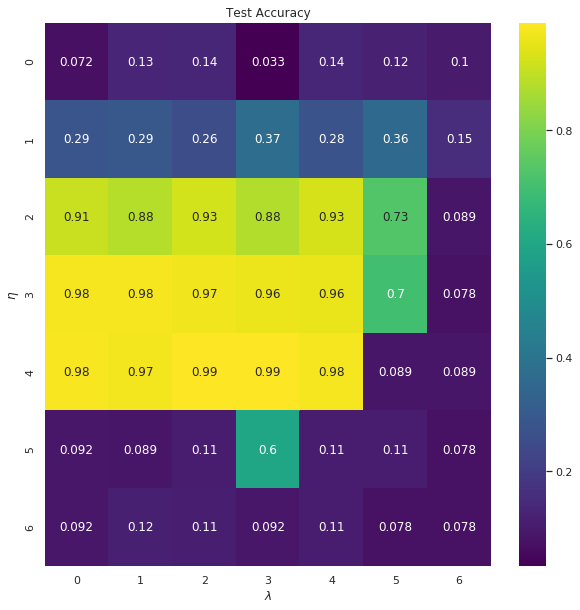

In [5]:
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        CNN = CNN_tf[i][j]

        train_accuracy[i][j] = CNN.train_accuracy
        test_accuracy[i][j] = CNN.test_accuracy

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

<!-- !split  -->
## Running with Keras

In [6]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import SGD

def create_convolutional_neural_network_keras(input_shape, receptive_field,
                                              n_filters, n_neurons_connected, n_categories,
                                              eta, lmbd):
    model = Sequential()
    model.add(Conv2D(n_filters, (receptive_field, receptive_field), input_shape=input_shape, padding='same',
              activation='relu', kernel_regularizer=l2(lmbd)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(n_neurons_connected, activation='relu', kernel_regularizer=l2(lmbd)))
    model.add(Dense(n_categories, activation='softmax', kernel_regularizer=l2(lmbd)))
    
    sgd = SGD(lr=eta)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model

epochs = 100
batch_size = 100
input_shape = X_train.shape[1:4]
receptive_field = 3
n_filters = 10
n_neurons_connected = 50
n_categories = 10

eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)

## Final part

In [7]:
CNN_keras = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
        
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        CNN = create_convolutional_neural_network_keras(input_shape, receptive_field,
                                              n_filters, n_neurons_connected, n_categories,
                                              eta, lmbd)
        CNN.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        scores = CNN.evaluate(X_test, Y_test)
        
        CNN_keras[i][j] = CNN
        
        print("Learning rate = ", eta)
        print("Lambda = ", lmbd)
        print("Test accuracy: %.3f" % scores[1])
        print()

Instructions for updating:
Use tf.cast instead.
360/360 [==============================] - 0s 1ms/step
Learning rate =  1e-05
Lambda =  1e-05
Test accuracy: 0.200

360/360 [==============================] - 0s 1ms/step
Learning rate =  1e-05
Lambda =  0.0001
Test accuracy: 0.197

360/360 [==============================] - 0s 1ms/step
Learning rate =  1e-05
Lambda =  0.001
Test accuracy: 0.225

360/360 [==============================] - 0s 1ms/step
Learning rate =  1e-05
Lambda =  0.01
Test accuracy: 0.172

360/360 [==============================] - 1s 2ms/step
Learning rate =  1e-05
Lambda =  0.1
Test accuracy: 0.156

360/360 [==============================] - 0s 1ms/step
Learning rate =  1e-05
Lambda =  1.0
Test accuracy: 0.192

360/360 [==============================] - 0s 1ms/step
Learning rate =  1e-05
Lambda =  10.0
Test accuracy: 0.147

360/360 [==============================] - 1s 1ms/step
Learning rate =  0.0001
Lambda =  1e-05
Test accuracy: 0.411

360/360 [===================

KeyboardInterrupt: 

## Final visualization

In [ ]:
        # visual representation of grid search
        # uses seaborn heatmap, could probably do this in matplotlib
        import seaborn as sns
        
        sns.set()
        
        train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
        test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
        
        for i in range(len(eta_vals)):
            for j in range(len(lmbd_vals)):
                CNN = CNN_keras[i][j]
        
                train_accuracy[i][j] = CNN.evaluate(X_train, Y_train)[1]
                test_accuracy[i][j] = CNN.evaluate(X_test, Y_test)[1]
        
                
        fig, ax = plt.subplots(figsize = (10, 10))
        sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
        ax.set_title("Training Accuracy")
        ax.set_ylabel("$\eta$")
        ax.set_xlabel("$\lambda$")
        plt.show()
        
        fig, ax = plt.subplots(figsize = (10, 10))
        sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
        ax.set_title("Test Accuracy")
        ax.set_ylabel("$\eta$")
        ax.set_xlabel("$\lambda$")
        plt.show()


## Fun links

1. [Self-Driving cars using a convolutional neural network](https://arxiv.org/abs/1604.07316)

2. [Abstract art using convolutional neural networks](https://deepdreamgenerator.com/)